<a href="https://colab.research.google.com/github/sasamori-takuya/internal_sharing/blob/master/first_of_all_series_04/mic_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2つのデータ $x, y$ の「相関」を見る指標  


1. **Person の積率相関係数（我々が通常「相関係数」と呼んでいるもの）**  
「$x$ と $y$ にどれだけ**線形相関**があるか」を指標  
>1に近い ⇒ $y = ax + b(a>0)$ っぽくなっている  
>-1に近い ⇒ $y = ax + b(a<0)$ っぽくなっている  
>0に近い ⇒ 線形関係では表されない
  
2. **MIC(Maximal Information Coefficient)**  
「非線形でもいいから $x$ と $y$ にどれだけ**(線形とは限らない)相関**があるか」を表す指標  
>1に近い ⇒ $x$ と $y$ は具体的に $y=f(x)$ と書けるかどうかは分からなけど、とりあえず関係してそう  
>0に近い ⇒ $x$ と $y$ は関係なさそう
  
3. **MAS(Maximum Asymmetry Score)**  
「$x$ と $y$ の関係がどれだけ単調でないか」を表す指標  
>0に近い ⇒ $x$ と $y$ の関係は単調(増大あるいは減少)でありそう  
>1に近い ⇒ $x$ と $y$ の関係は単調ではなさそう
  
4. **MEV(Maximum Edge Value)**  
「$y = f(x)$ みたいな $f$ がありそうかどうか」を表す指標
>0に近い ⇒ そういう $f$ はなさそう  
>1に近い ⇒ そういう $f$ はありそう  
  
5. **MCN(Minimum Cell Number)**  
「複雑性」を表す指標  
大きいほど複雑であるといえる  
MASが小さければMCNも小さくなる


In [1]:
!pip install minepy
import numpy as np
from minepy import MINE
from matplotlib import pyplot as plt
%matplotlib inline

     |████████████████████████████████| 501kB 2.8MB/s 
  Created wheel for minepy: filename=minepy-1.2.4-cp36-cp36m-linux_x86_64.whl size=174018 sha256=c6731c36e9a37062795730b03994c20a80e925cf29eefe2974062fcd7de4b31c
  Stored in directory: /root/.cache/pip/wheels/ea/ad/3a/0e6f5c87be5ee6ad987bd7a317dd6b92e616d559f63f4d8acc
Successfully built minepy


In [0]:
def print_indicators(x, y):
  corr = np.corrcoef(x, y)[0, 1]
  mine = MINE()
  mine.compute_score(x, y)

  print("[線形相関の指標] Pearson Corr = {:.3f}".format(corr))
  print("[線形とは限らない相関の指標] MIC = {:.3f}".format(mine.mic()))
  print("[単調関係がなさそうかどうかの指標] MAS = {:.3f}".format(mine.mas()))
  print("[具体的な関数がありそうかどうかの指標] MEV = {:.3f}".format(mine.mev()))
  print("MCN (eps=0) = {:.3f}".format(mine.mcn(0)))
  print("MCN (eps=1-MIC) = {:.3f}".format(mine.mcn_general()))
  print("GMIC = {:.3f}".format(mine.gmic()))
  print("TIC = {:.3f}".format(mine.tic()))
  
  plt.scatter(x, y)
  return None

# $y=x + noise$

[線形相関の指標] Pearson Corr = 0.995
[線形とは限らない相関の指標] MIC = 1.000
[単調関係がなさそうかどうかの指標] MAS = 0.036
[具体的な関数がありそうかどうかの指標] MEV = 1.000
MCN (eps=0) = 3.000
MCN (eps=1-MIC) = 3.000
GMIC = 0.991
TIC = 15.697


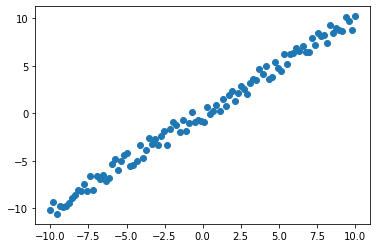

In [3]:
np.random.seed(1)

N = 100
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-1, 1, size = N)
y = x + noise

print_indicators(x, y)

実験意図としては「Person Corrがいい値のときに MIC はいい値を出してくれるかどうか」  
まず，Person Corr は 0.995 なので「かなり強い線形相関がある」がわかる（当たり前）  
MIC も 1.000 なので「かなり強い相関がある」と出してくれる  (これも当たり前体操)  
MAS は 0.036 とかなり小さいので「単調性が強い」と出してくれる(これも当たり前体操)  
MEV は 1.000 とかなり大きいので「$y$ と $x$ の関係は具体的に表示できる可能性が非常に高い」と出してくれる(そりゃそうじゃ)  
  
よって，確かに「元々 Person Corr が(想定通りに)良い値が出てくれる場合，MINEの各値も良い値が出てくれる」ようだ

# $y = x^2 + noise$

[線形相関の指標] Pearson Corr = 0.018
[線形とは限らない相関の指標] MIC = 0.940
[単調関係がなさそうかどうかの指標] MAS = 0.617
[具体的な関数がありそうかどうかの指標] MEV = 0.940
MCN (eps=0) = 3.807
MCN (eps=1-MIC) = 3.585
GMIC = 0.781
TIC = 9.169


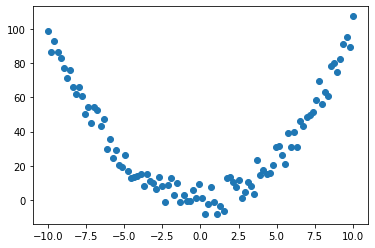

In [4]:
np.random.seed(2)

N = 100
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-10, 10, size = N)  # 2乗しているので [-1, 1] だと変動が弱いから区間幅を広げる
y = x**2 + noise

print_indicators(x, y)

次に Pearson Corr が役に立たないケースの代表例である $y = x^2$ について調べる    
Person Corr は 0.018 なので，線形相関はほとんどない  
これをたまに「$x$ と $y$ は"関係ない"」と勘違いする人もいるが，当然見て分かる通り，明らかな"関係"がある(あくまで"線形関係がない"しか言えない)  
(※ちなみに $Corr(x, y) = 0$ のことを「無相関である」ということが多いが，多分この用語が混乱の原因だと思われる．もっと言うと「独立」と「無相関」も混同しやすいというのも混乱の原因．数理統計学的には「独立」は「無相関」よりも強い概念であり「無相関だけど独立ではない」反例はいくらでもある)  
  
一方 MIC は 0.940 と出してくれている  
MAS は 0.617 とそこそこ大きいので「単調性ではなさそう」と出してくれていて，今の場合は確かに単調でないのは明らか  
MEV は 0.940 とかなり大きいので「$y$ と $x$ の関係は具体的に表示できる可能性が非常に高い」と出してくれる  
  
よって「Person Corr がダメでもMINE統計量ならOK」が実証されている

# $y = e^x + noise$

[線形相関の指標] Pearson Corr = 0.521
[線形とは限らない相関の指標] MIC = 0.658
[単調関係がなさそうかどうかの指標] MAS = 0.023
[具体的な関数がありそうかどうかの指標] MEV = 0.658
MCN (eps=0) = 3.585
MCN (eps=1-MIC) = 3.322
GMIC = 0.482
TIC = 6.841


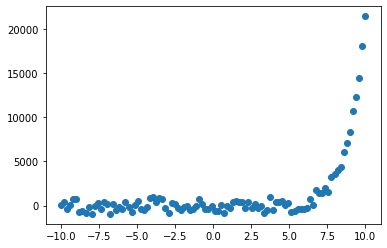

In [5]:
np.random.seed(3)

N = 100
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-1000, 1000, size = N)    # expなので [-1, 1] だと変動が弱いから区間幅を広げる
y = np.exp(x) + noise

print_indicators(x, y)

次に Pearson Corr が役に立たないケースの2つ目の例は $y = e^x$    
特徴としては「非線形」，「単調増大」  
つまり $y = x^2$ との違いとしては「単調性」がある  
よって想定としては「MIC:大きい，MAS：小さい，MEV:大きい」となってほしい  
   
Pearson Corr は 0.521 であり，線形相関はあるとは出してくれているがやや弱い    
一方 MIC は 0.658 であり，Pearson Corr よりは大きく出ている  
(**想定していたよりは小さかったので少し驚いた**)  
MAS は 0.023 とかなり小さいので「単調性がある」と出してくれて，これは想定通り  
MEV は 0.658 で，これまでと比べると少し小さくなった  
  
MIC と MEV の値が少し小さくなったのが気になるが，一応は"想定内"の実験結果ではある

# $y = \sin x + noise$

[線形相関の指標] Pearson Corr = 0.103
[線形とは限らない相関の指標] MIC = 0.677
[単調関係がなさそうかどうかの指標] MAS = 0.409
[具体的な関数がありそうかどうかの指標] MEV = 0.677
MCN (eps=0) = 3.807
MCN (eps=1-MIC) = 3.585
GMIC = 0.278
TIC = 4.100


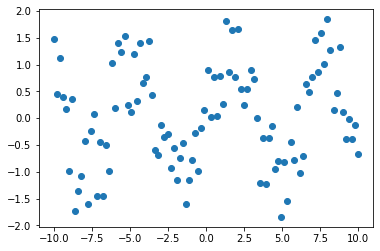

In [6]:
np.random.seed(4)

N = 100
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-1, 1, size = N)
y = np.sin(x) + noise

print_indicators(x, y)

次に Pearson Corr が役に立たないケースの3つ目の例は $y = \sin x$    
特徴としては「非線形」，「周期性(単調でない)」  
想定としては「MIC:大きい，MAS：大きい，MEV:大きい」となってほしい  
   
Pearson Corr は 0.103 であり，線形相関は当然ないと判断されている    
一方 MIC は 0.677 であり，Pearson Corr よりは大きく出ている  
MAS は 0.409 であり「単調性がある」とは判断してくれていない(想定通り)  
MEV は 0.677 で，これまでと比べると少し小さいが，ある程度は大きい  
  
MEV の値が少し小さいのが気になるが，一応は"想定内"の実験結果ではある

# $y = x$ と $y = -x$ の2つの直線

[線形相関の指標] Pearson Corr = 0.004
[線形とは限らない相関の指標] MIC = 0.553
[単調関係がなさそうかどうかの指標] MAS = 0.037
[具体的な関数がありそうかどうかの指標] MEV = 0.300
MCN (eps=0) = 3.907
MCN (eps=1-MIC) = 3.170
GMIC = 0.211
TIC = 13.517


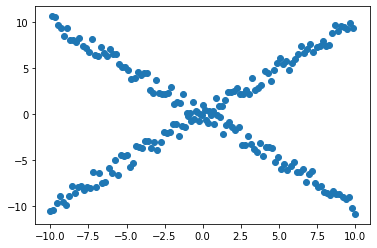

In [7]:
np.random.seed(5)

N = 200
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-1, 1, size = N)
y = [x[i] if i % 2 == 0 else -x[i] for i in range(len(x))] + noise

print_indicators(x, y)

関数が2つ存在する場合にどうなるのか試してみた    
   
Pearson Corr は 0.004 であり，線形相関は全くないと判断されている    
一方 MIC は 0.553 であり，何かしらの決して弱くない相関はあると判断されている  
MAS は 0.037 であり「単調性がある」と判断してしまっている  
(**※どうやらこういう分岐がある場合では MAS を過信するのはよくなさそうだ**)  
MEV は 0.300 で，これまでと比べるとけっこう低くなる  
(**当然1つの関数で表せられるようなものではないので妥当と言える**)  
  
MAS が想定と異なった結果になった(**なにが本質的な原因なのかについては追い切れていない**)  

# $x^2 + y^2 = 1$

[線形相関の指標] Pearson Corr = -0.022
[線形とは限らない相関の指標] MIC = 0.441
[単調関係がなさそうかどうかの指標] MAS = 0.110
[具体的な関数がありそうかどうかの指標] MEV = 0.268
MCN (eps=0) = 4.585
MCN (eps=1-MIC) = 2.585
GMIC = 0.187
TIC = 9.715


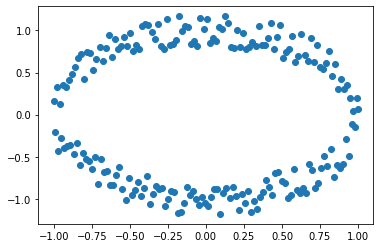

In [8]:
np.random.seed(6)

N = 200
x = np.linspace(-1, 1, N)  # 範囲を変更している
noise = np.random.uniform(-0.2, 0.2, size = N)  # 変動も変更している
y = [np.sqrt(1 - x[i]**2) if i % 2 == 0 else - np.sqrt(1 - x[i]**2) for i in range(len(x))] + noise

print_indicators(x, y)

円形の場合にどうなるのか試してみた    
   
Pearson Corr は -0.022 であり，線形相関は全くないと判断されている    
一方 MIC は 0.441 であり，何かしらの決して弱くない相関はあると判断されている  
MAS は 0.110 であり「単調性がある」と判断してしまっている  
(**※どうやらこのような場合でも MAS を過信するのはよくなさそうだ**)  
MEV は 0.268 で，これまでと比べるとけっこう低くなる  
(**さっきとは違い，1つの式で書けるは書けるので，もう少し値は大きくなるかと思ったが，そういうわけでもないらしい**)  
  
MAS と MEV が想定と異なった結果になった(**なにが本質的な原因なのかについては追い切れていない**)  

# $y = x^2$ と $y = -x^2$ の2つの曲線

[線形相関の指標] Pearson Corr = -0.037
[線形とは限らない相関の指標] MIC = 0.467
[単調関係がなさそうかどうかの指標] MAS = 0.036
[具体的な関数がありそうかどうかの指標] MEV = 0.286
MCN (eps=0) = 4.585
MCN (eps=1-MIC) = 3.000
GMIC = 0.169
TIC = 11.884


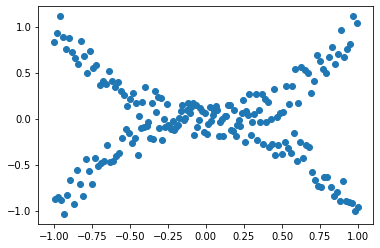

In [9]:
np.random.seed(7)

N = 200
x = np.linspace(-1, 1, N)
noise = np.random.uniform(-0.2, 0.2, size = N)
y = [x[i]**2 if i % 2 == 0 else - x[i]**2 for i in range(len(x))] + noise

print_indicators(x, y)

先ほどの×のような形をより非線形にした場合にどうなるのか試してみた    
   
Pearson Corr は -0.037 であり，線形相関は全くないと判断されている    
一方 MIC は 0.467 であり，何かしらの決して弱くない相関はあると判断されている  
MAS は 0.036 であり「単調性がある」と判断してしまっている  
MEV は 0.286 で，これまでと比べるとけっこう低くなる  
  
やはりこの場合でも MAS と MEV の出力結果にはやや疑問が残る結果となった

# $y = x - [x]$

[線形相関の指標] Pearson Corr = 0.191
[線形とは限らない相関の指標] MIC = 0.552
[単調関係がなさそうかどうかの指標] MAS = 0.361
[具体的な関数がありそうかどうかの指標] MEV = 0.552
MCN (eps=0) = 3.807
MCN (eps=1-MIC) = 3.322
GMIC = 0.315
TIC = 3.598


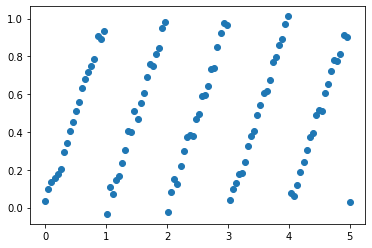

In [10]:
np.random.seed(8)

N = 100
x = np.linspace(0, 5, N)  # 範囲を変更している
noise = np.random.uniform(-0.05, 0.05, size = N)  # 変動も変更している
y = x - np.floor(x) + noise
print_indicators(x, y)

$\sin x$ とはまた違う周期的な場合にどうなるのか試してみた    
   
Pearson Corr は 0.191 であり，弱い線形相関があるかないか微妙なところである  
一方 MIC は 0.552 であり，何かしらの決して弱くない相関はあると判断されている  
MAS は 0.361 であり「単調性はなさそう」と判断した  
MEV は 0.552 で，これも想定に近い結果  
  
MAS の結果が想定外になる原因としては，データが分岐しているからダメというよりは，  
1つの関数で表されるかどうかによる部分が大きそうだ  

# $y = x^2$ と $z = \sin x$ として $y$ と $z$ の相関

[線形相関の指標] Pearson Corr = 0.179
[線形とは限らない相関の指標] MIC = 0.691
[単調関係がなさそうかどうかの指標] MAS = 0.401
[具体的な関数がありそうかどうかの指標] MEV = 0.691
MCN (eps=0) = 4.585
MCN (eps=1-MIC) = 2.585
GMIC = 0.594
TIC = 15.969


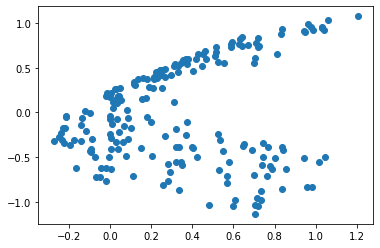

In [11]:
np.random.seed(9)

N = 200
x = np.linspace(-1, 1, N)
noise = np.random.uniform(-0.3, 0.3, size = N)
y = x**2 + noise
z = np.sin(x) + noise

print_indicators(y, z)

$y = f(x)$ と $z = g(x)$ として，$(y, z)$ の相関を測るとどうなるか試してみた   
Pearson Corr は 0.179 であり，弱い線形相関があるかないか微妙なところである  
一方 MIC は 0.691 であり，何かしらの決して弱くない相関はあると判断されている  
MAS は 0.401 であり「単調性はなさそう」と判断した  
MEV は 0.691 で，関数で表されるものであると判断した  
  
当然 $x = \pm \sqrt{y}$ から $z = \sin(\pm \sqrt{y})$ と表されるので，相関はあるに決まっている  
実際にそれを示すような結果となっている  
(**逆に言えば「偏相関」のようなものは出してはくれない可能性がある？**)

# AR(1) モデル $y_t = \dfrac{1}{2} y_{t-1} + \epsilon_{t}$

[線形相関の指標] Pearson Corr = -0.081
[線形とは限らない相関の指標] MIC = 0.249
[単調関係がなさそうかどうかの指標] MAS = 0.054
[具体的な関数がありそうかどうかの指標] MEV = 0.249
MCN (eps=0) = 3.807
MCN (eps=1-MIC) = 2.585
GMIC = 0.116
TIC = 2.201


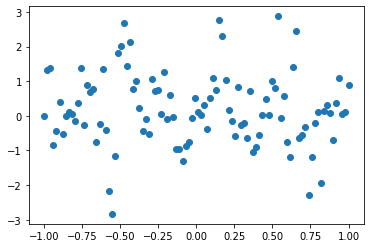

In [12]:
np.random.seed(10)

N = 100
x = np.linspace(-1, 1, N)
y = np.zeros(N)  # 初期化
phi = .5

# いわゆるAR(1)モデル
for i in range(len(y)):
  if i > 0:
    y[i] = phi * y[i-1] + np.random.normal(0, 1)

print_indicators(x, y)

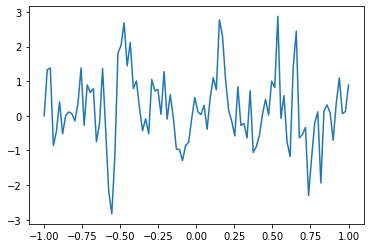

In [13]:
# 参考
plt.plot(x, y)

時系列でおなじみの AR(1) モデルの場合にどうなるか試してみた   
Pearson Corr は -0.081 であり，線形相関はほとんどないとみなされる  
MIC も 0.249 であり，相関は弱そうだ  
MAS は 0.054 であり「単調性はある」と判断した  
(**単位根過程ならまだしも，AR係数は弱定常になるように設定しているのでこれは妥当ではないように思われる**)  
MEV は 0.249 で，関数で表されるかどうか微妙なところである  
  
$y$ は $y$ 自身の過去にしか依らないので，$x$ (今の場合は時間を想定) とは相関はないはず  
それを考えると，概ね期待通りの結果が出ていると思われる  

# $y = noise$

[線形相関の指標] Pearson Corr = 0.150
[線形とは限らない相関の指標] MIC = 0.247
[単調関係がなさそうかどうかの指標] MAS = 0.017
[具体的な関数がありそうかどうかの指標] MEV = 0.247
MCN (eps=0) = 3.807
MCN (eps=1-MIC) = 2.585
GMIC = 0.138
TIC = 2.221


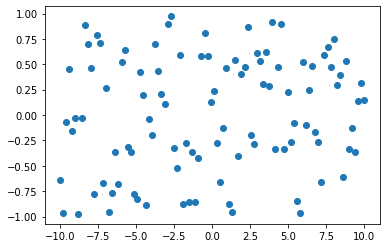

In [14]:
np.random.seed(11)

N = 100
x = np.linspace(-10, 10, N)
noise = np.random.uniform(-1, 1, size = N)
y = noise

print_indicators(x, y)

最後にノイズしかない状況だとどうなるかを試してみた      
   
Pearson Corr は 0.150 であり，線形相関はかなり弱いと判断されている    
MIC も 0.247 であり，関係は弱そうだと判断されている  
MAS は 0.017 であり「単調性がある」とは判断してしまっている  
MEV は 0.247 で，なんとも言い難い  
  
ノイズしかないので「$x$ と $y$ には相関がある」と算出されても困る  
それを踏まえると MIC はけっこう小さくなってくれているので想定通り  
MAS は相変わらずよく分からないことになっている  

# リファレンス

https://minepy.readthedocs.io/en/latest/python.html  
MINEのPythonAPI の doc  
MINEの使い方が記載されている
  
https://science.sciencemag.org/content/334/6062/1518.full?ijkey=cRCIlh2G7AjiA&keytype=ref&siteid=sci  
MICの原論文

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3561932/  
臨床データと診断画像の相関について調べている論文(詳しく読んでいないのでよく分からない)  
MICなどの数式がしっかりと書いている  
  
http://www.exploredata.net/Overview  
MINEの開発doc  
元々はJavaで作られていてPythonのライブラリはただそれを動かしているだけらしい  
  
http://jmlr.org/papers/v17/15-308.html  
MICについて深堀している論文  
MICの数式について(調べた限りでは)一番詳しく書いている  
ただ MAS や MEV については書いていない  
